In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13, 5)

# Train dataset

In [3]:
x_train = torch.rand(100)
x_train = 20 * x_train - 10

y_train = torch.sin(x_train)

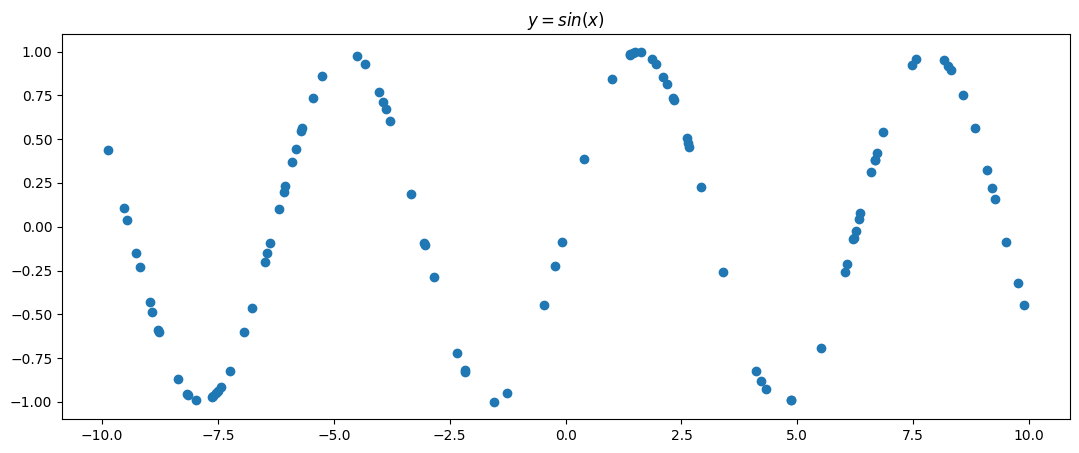

In [4]:
plt.scatter(x_train, y_train)
plt.title("$y = sin(x)$")
plt.show()

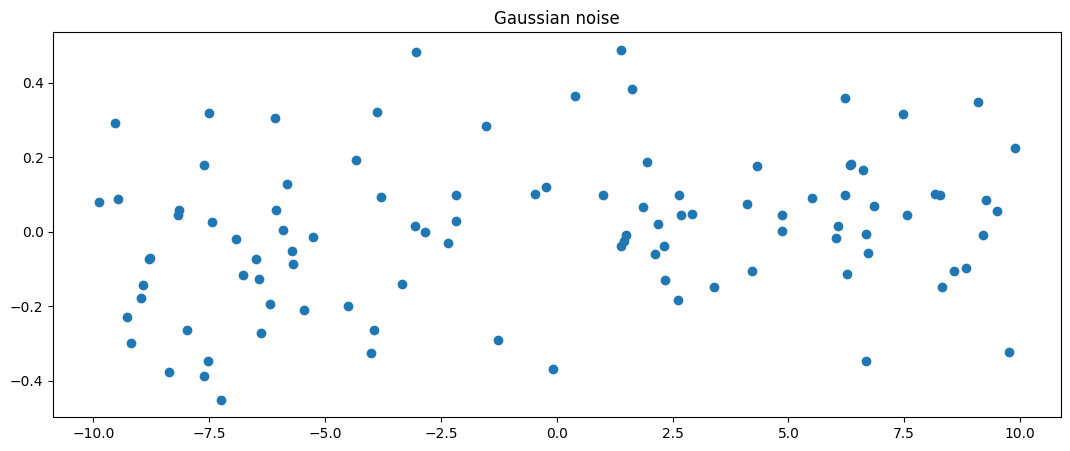

In [5]:
torch.manual_seed(837)

noise = torch.randn(y_train.shape) / 5

plt.scatter(x_train, noise)
plt.title("Gaussian noise")
plt.show()

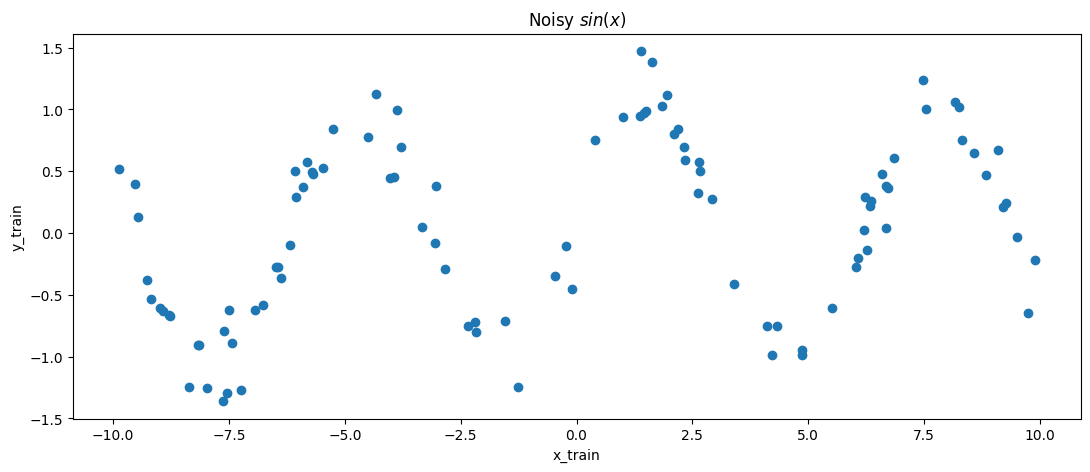

In [6]:
y_train = y_train + noise

plt.scatter(x_train, y_train)
plt.title("Noisy $sin(x)$")
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.show()

In [13]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_train.shape, y_train.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

# Validation dataset

In [25]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation)

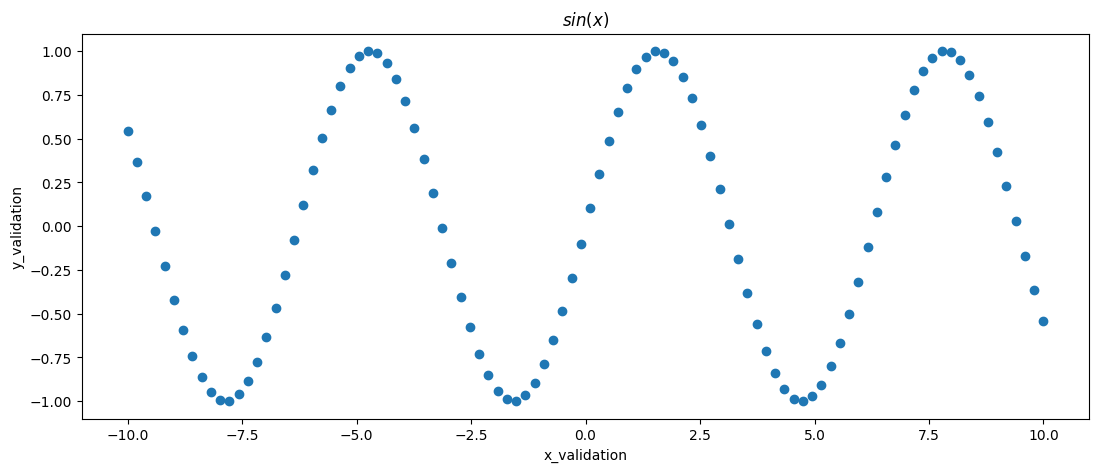

In [26]:
plt.scatter(x_validation, y_validation)
plt.title("$sin(x)$")
plt.xlabel("x_validation")
plt.ylabel("y_validation")
plt.show()

In [27]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

# Model construction

In [95]:
class SineNet(torch.nn.Module):
    def __init__(
        self,
        n_hidden_neurons: int
    ) -> None:

        super().__init__()

        self.fc1 = torch.nn.Linear(
            in_features=1,
            out_features=n_hidden_neurons
        )
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(
            in_features=n_hidden_neurons,
            out_features=1
        )

    def forward(self, x):

        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)

        return x

In [105]:
sine_net = SineNet(n_hidden_neurons=50)

# Prediction

Попробуем сразу сделать предикт сети, чтобы посмотреть, как она работает на инициализированных весах:

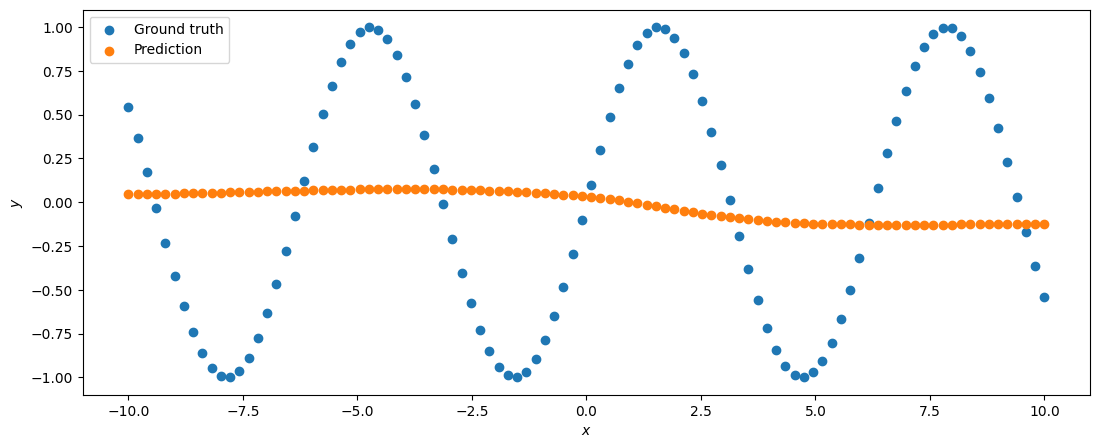

In [106]:
def predict(net, x, y):
    y_pred = net(x)

    plt.scatter(x, y, label="Ground truth")
    plt.scatter(x, y_pred.data, label="Prediction")

    plt.legend(loc="upper left")
    plt.xlabel("$x$")
    plt.ylabel("$y$")

predict(sine_net, x_validation, y_validation)

# Задание - практика с SineNet

Давайте попрактикуемся с SineNet:

1) Добавим еще один fc-слой

2) Заменим активацию между слоями на гиперболический тангенс

In [99]:
class SineNet2(torch.nn.Module):
    def __init__(
        self,
        n_hidden_neurons: int
    ) -> None:

        super().__init__()

        self.fc1 = torch.nn.Linear(
            in_features=1,
            out_features=n_hidden_neurons
        )
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(
            in_features=n_hidden_neurons,
            out_features=n_hidden_neurons
        )
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(
            in_features=n_hidden_neurons,
            out_features=1
        )

    def forward(self, x):

        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)

        return x

# Optimizer

In [107]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=1e-2)

# Loss functiion

In [108]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

# Training procedure

In [109]:
import logging
logging.basicConfig(
    level=logging.INFO
)

logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [110]:
N_EPOCH = 2000

for epoch in range(N_EPOCH):

    if epoch % 500 == 0:
        logger.info(f"{epoch} epoch / {N_EPOCH}")
    optimizer.zero_grad()

    y_pred = sine_net(x_train)
    loss_value = loss(pred=y_pred, target=y_train)

    loss_value.backward()

    optimizer.step()

INFO:root:0 epoch / 2000
INFO:root:500 epoch / 2000
INFO:root:1000 epoch / 2000
INFO:root:1500 epoch / 2000


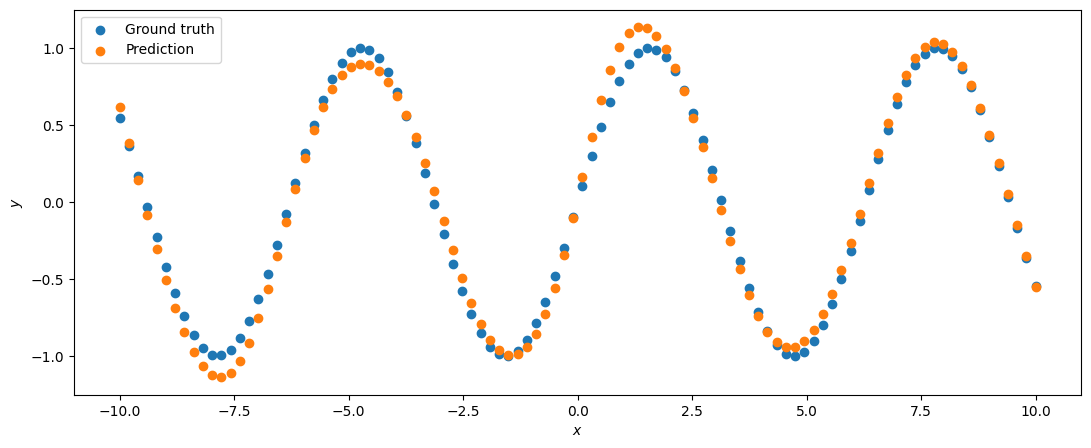

In [111]:
predict(sine_net, x_validation, y_validation)

# Задание - RegressionNet

Обучим нейронную сеть для задачи регрессии:

Возьмем более сложную функцию в качестве таргета: $y=2^x sin(2^{-x})$

Кроме того, мы хотим получить хорошую метрику MAE на валидации.

In [112]:
import torch

In [113]:
def target_function(x):
    return 2 ** x * torch.sin(2 ** (-x))

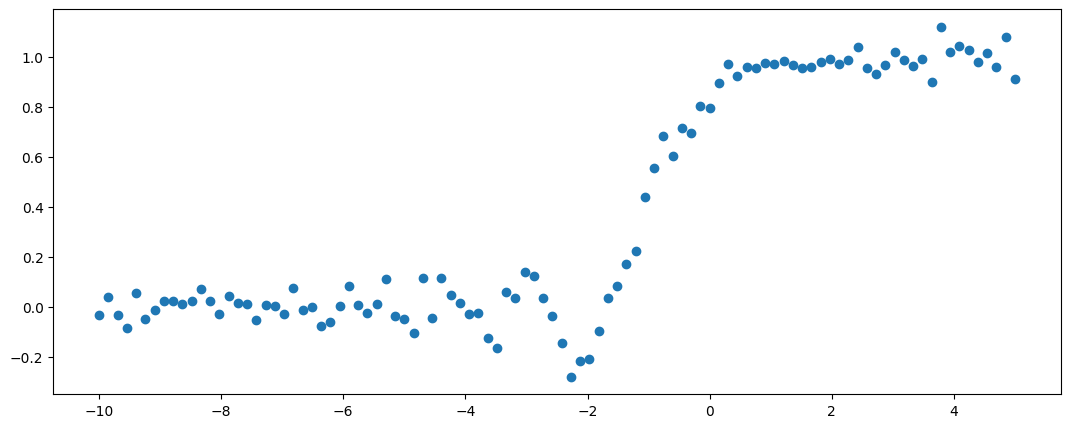

In [118]:
torch.manual_seed(837)

x_train = torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20
y_train += noise

plt.scatter(x_train, y_train)

In [119]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

In [120]:
x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)

x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

In [273]:
class RegressionNet(torch.nn.Module):
    def __init__(
        self,
        n_hidden_neurons_1 : int,
        n_hidden_neurons_2 : int
    ):

        super().__init__()

        self.fc1 = torch.nn.Linear(
            in_features=1,
            out_features=n_hidden_neurons_1
        )

        self.act1 = torch.nn.Sigmoid()

        self.fc2 = torch.nn.Linear(
            in_features=n_hidden_neurons_1,
            out_features=n_hidden_neurons_2
        )

        self.act2 = torch.nn.Sigmoid()

        self.fc3 = torch.nn.Linear(
            in_features=n_hidden_neurons_2,
            out_features=n_hidden_neurons_2
        )

        self.act3 = torch.nn.Sigmoid()

        self.fc4 = torch.nn.Linear(
            in_features=n_hidden_neurons_2,
            out_features=1
        )

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        return x


In [274]:
def loss_mae(pred, target):
    return torch.abs(pred - target).mean()


In [275]:
def loss_mse(pred, target):
    return ((pred - target) ** 2).mean()


In [276]:
import logging

logging.basicConfig(
    level=logging.INFO
)

logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [277]:
net = RegressionNet(32, 64)

In [278]:
LR = 1e-2

optimizer = torch.optim.Adam(net.parameters(), lr=LR)

In [279]:
N_EPOCH = 2000
N_PERIOD = 500

loss_history = []

for epoch in range(N_EPOCH):
    if epoch % N_PERIOD == 0:
        logger.info(f"{epoch} epoch / {N_EPOCH}")

    optimizer.zero_grad()

    y_pred = net(x_train)

    loss_value = loss_mae(pred=y_pred, target=y_train)
    # loss_value = loss_mse(pred=y_pred, target=y_train)
    loss_value.backward()

    optimizer.step()


    with torch.no_grad():
        loss_train = loss_mae(pred=net(x_train), target=y_train).item()
        loss_val = loss_mae(pred=net(x_validation), target=y_validation).item()
        loss_history.append((loss_train, loss_val))

    if epoch % N_PERIOD == 0:
        logger.info(f"{loss_train=:.3f} {loss_val=:.3f}")


INFO:root:0 epoch / 2000
INFO:root:loss_train=0.459 loss_val=0.459
INFO:root:500 epoch / 2000
INFO:root:loss_train=0.048 loss_val=0.026
INFO:root:1000 epoch / 2000
INFO:root:loss_train=0.040 loss_val=0.018
INFO:root:1500 epoch / 2000
INFO:root:loss_train=0.038 loss_val=0.019


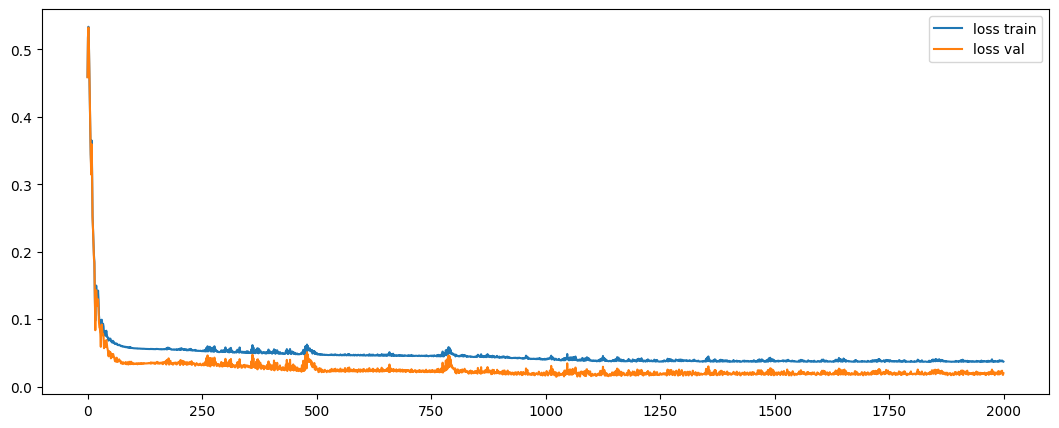

In [281]:
plt.plot(
    range(N_EPOCH),
    [x[0] for x in loss_history],
    label='loss train'
)

plt.plot(
    range(N_EPOCH),
    [x[1] for x in loss_history],
    label='loss val'
)

plt.legend()
plt.show()

In [282]:
def predict(net, x, y, loss):
    y_pred = net(x)

    plt.scatter(x, y, label="Ground truth")
    plt.scatter(x, y_pred.data, label="Prediction")

    plt.legend(loc="upper left")
    plt.xlabel("$x$")
    plt.ylabel("$y$")

    with torch.no_grad():
        loss_value = loss(y_pred, y)
    print(f"{loss_value=}")

loss_value=tensor(0.0199)


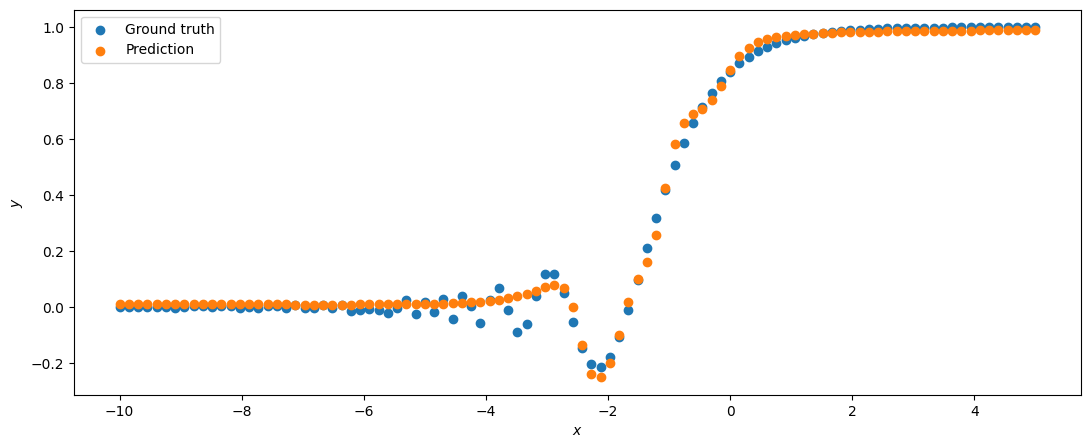

In [283]:
predict(net, x_validation, y_validation, loss_mae)